In [1]:
import numpy as np
import matplotlib.pyplot as plt

import IO

plt.rcParams ['figure.figsize'] = [20, 15]

In [2]:
# # Вспомогательные данные, по которым производится моделирование
map_1_dataset = IO.import_dataset_from_file("..\\Data\\Map_1.txt")
map_2_dataset = IO.import_dataset_from_file("..\\Data\\Map_2.txt")
# map_3_dataset = IO.import_dataset_from_file("..\\Data\\Map_3.txt")
# map_4_dataset = IO.import_dataset_from_file("..\\Data\\Map_4.txt")
# map_5_dataset = IO.import_dataset_from_file("..\\Data\\Map_5.txt")
#
# # Данные, по которым необходимо смоделировать
point_dataset = IO.import_dataset_from_file("..\\Data\\Point_dataset.txt")

In [3]:
def mean_pooling(input_array, pool_size):
    # Dimensions of the input array
    input_height, input_width = input_array.shape

    # Dimensions of the output array
    output_height = input_height // pool_size
    output_width = input_width // pool_size

    # Initialize the output array
    output_array = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            output_array[i, j] = np.mean(input_array[i * pool_size : (i + 1) * pool_size, j * pool_size : (j + 1) * pool_size])

    return output_array

In [4]:
point_dataset = np.load("Point_dataset_on_map_grid.npy")

In [5]:
point_dataset_pool = mean_pooling(point_dataset, 20)

In [6]:
file_names = ["Map_1.npy", "Map_2.npy", "Map_3.npy", "Map_4.npy", "Map_5.npy"]

arrays = []

for i, item in enumerate(file_names):
    arrays.append(np.load(item))
    #arrays[i][arrays[i] == 0] = np.nan

In [7]:
arrays[2] = arrays[2][:-1, :]
arrays[3] = arrays[3][:-1, :]

In [8]:
maps_points_dataset = []
point_dataset_arr = 0
for map in arrays:
    maps_points_dataset.append(map[point_dataset != 0])

#print(maps_points_dataset[0])

point_dataset_arr = point_dataset[point_dataset != 0]

matrix = np.empty((440, 5))

for i, arr in enumerate(maps_points_dataset):
    matrix[:, i] = arr


In [9]:
from sklearn.linear_model import LinearRegression
# reg = LinearRegression().fit(matrix[:5, :], point_dataset_arr[:5])
reg = LinearRegression().fit(matrix, point_dataset_arr)

In [10]:
bias = reg.intercept_
weights = reg.coef_
print(weights, bias)

[-1.32603681e+01 -1.74387812e+02  1.52846929e-01 -1.40714208e-03
  2.43777269e+02] -371.8803743763266


In [11]:
# print(reg.predict(np.array([[4, 5]])))

In [12]:
matrix[:10, :].dot(weights) + bias, point_dataset_arr[:10]

(array([14.18637089, 14.38875183, 14.55639547, 14.90261268, 14.99273105,
        15.51334974, 14.46759147, 15.16056971, 15.20492178, 15.36948198]),
 array([14.62249662, 14.67657102, 15.70418611, 15.65549254, 15.28458938,
        15.8067573 , 14.70364593, 15.8094933 , 15.01206938, 15.02057318]))

In [13]:
final_grid = np.zeros(arrays[0].shape)

for i in range(len(arrays)):
    final_grid += arrays[i] * weights[i]

final_grid += bias



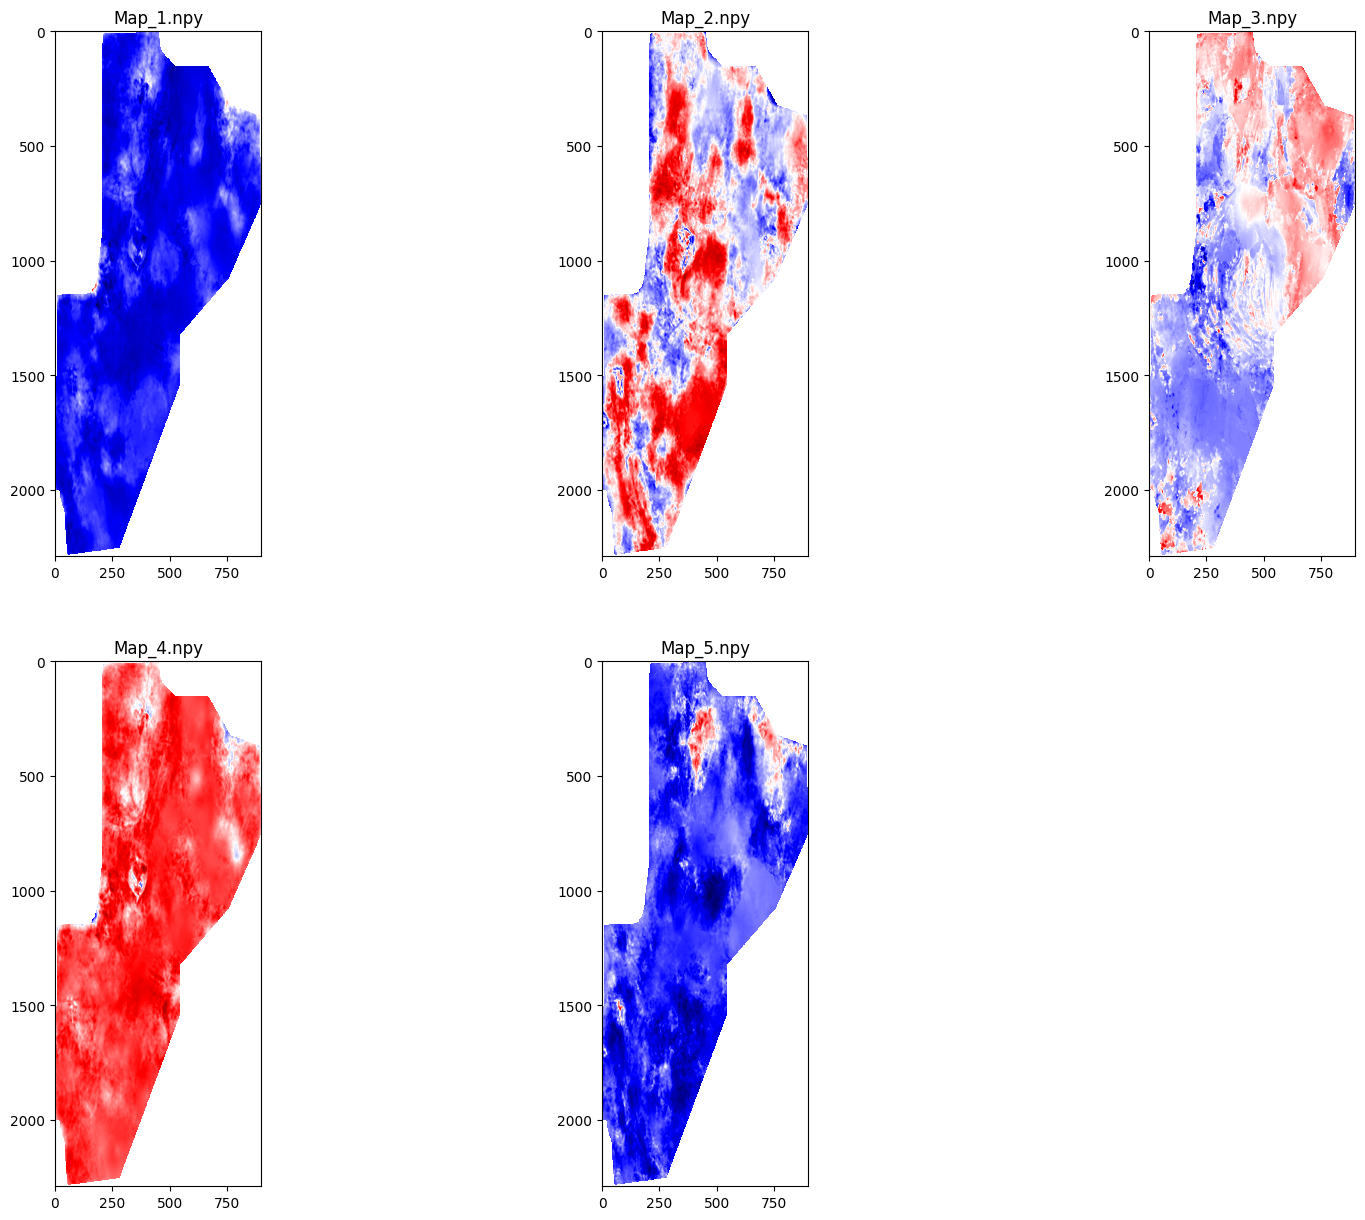

In [14]:
print_maps = arrays.copy()
print_final_grid = final_grid.copy()
print_point_dataset_pool = point_dataset_pool.copy()


for i, item in enumerate(file_names):
    print_maps[i][print_maps[i] == 0] = np.nan

    plt.subplot(2, 3, i + 1)

    plt.title(item)
    plt.imshow(print_maps[i], cmap='seismic')

# plt.figure(figsize=(30, 30))

plt.show()

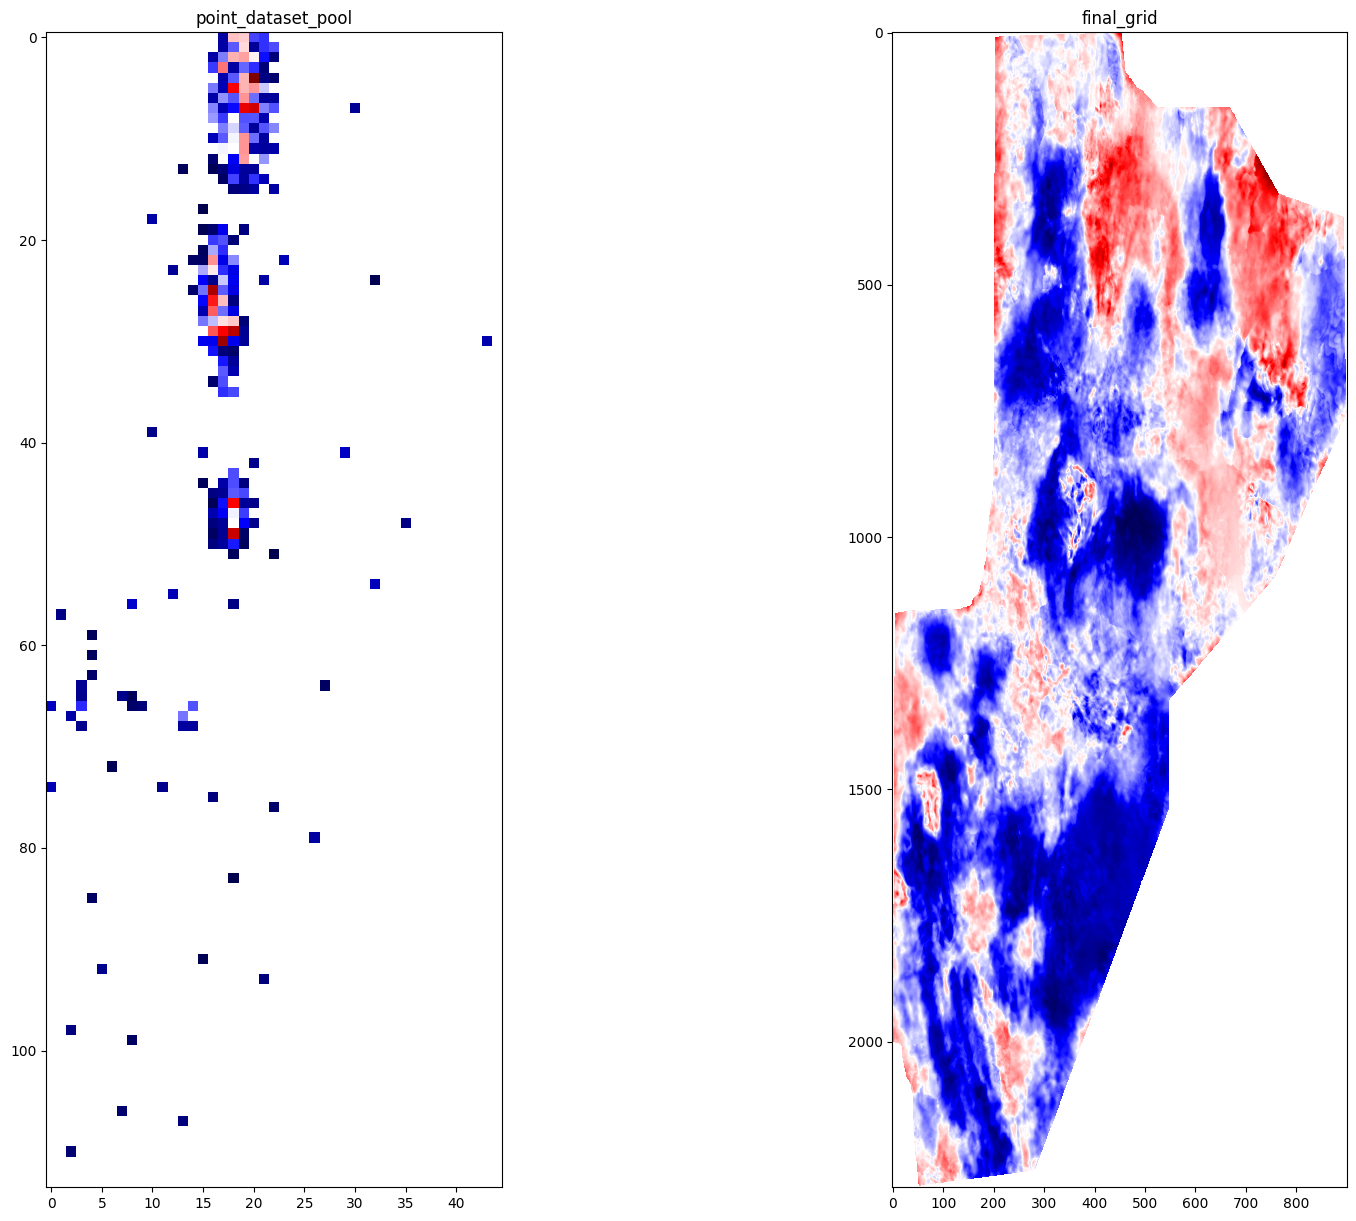

In [15]:
print_point_dataset_pool[print_point_dataset_pool == 0] = np.nan

plt.subplot(1, 2, 1)
plt.title("point_dataset_pool")
plt.imshow(print_point_dataset_pool, cmap='seismic')

print_final_grid[final_grid < 0] = np.nan

plt.subplot(1, 2, 2)
plt.title("final_grid")
plt.imshow(print_final_grid, cmap='seismic')

plt.show()

In [16]:
number_of_point = len(final_grid[point_dataset != 0] - point_dataset[point_dataset != 0])
print(number_of_point)

440


In [17]:
print((((final_grid[point_dataset != 0] - point_dataset[point_dataset != 0]) ** 2).sum() / number_of_point) ** 0.5)

1.3392079515733233
